In [1]:
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import adam
from keras.models import Model
from keras.layers import Dense,Input,BatchNormalization,Dropout
from keras.constraints import max_norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from sklearn import metrics
import pdb

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('wineQualityReds.csv',sep=',', header=1)
dataset.head()

,1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
0,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [3]:
PropTest = 0.1
NTrain=int((1-PropTest)*dataset.shape[0])
dataset_train=dataset.iloc[:NTrain,:].values
dataset_test=dataset.iloc[NTrain:,:].values

In [4]:
shuffle(dataset_train) 
x_train= dataset_train[:,:-1]
y_train= dataset_train[:,-1] 
x_test= dataset_test[:,:-1]
y_test= dataset_test[:,-1]

In [5]:
y_train = to_categorical(y_train, None)
y_test = to_categorical(y_test, None)
LowestIndex=3
y_train=y_train[:,LowestIndex:]
y_test=y_test[:,LowestIndex:]

In [6]:
InputTensor = Input(shape=(x_train.shape[1],))
Tensor=Dense(100,activation='relu')(InputTensor) 
Tensor=Dense(100,activation='relu')(Tensor)
OutTensor=Dense(y_train.shape[1],activation='sigmoid')(Tensor)

model=Model(InputTensor,OutTensor)

In [7]:
import keras
LearningRate= 1e-4
Optimizer=keras.optimizers.adam(lr=LearningRate)
model.compile(loss='mean_squared_error', optimizer=Optimizer,metrics=['accuracy'])


In [8]:
PropVal=0.1
batch_size = 100
epochs = 1000
history=model.fit(x_train,y_train,validation_split=PropVal,epochs=epochs,batch_size=batch_size,verbose=2,validation_data=[x_test,y_test])

Train on 1438 samples, validate on 160 samples
Epoch 1/1000
 - 0s - loss: 0.3808 - acc: 0.1426 - val_loss: 0.4645 - val_acc: 0.0125
Epoch 2/1000
 - 0s - loss: 0.2797 - acc: 0.1342 - val_loss: 0.3230 - val_acc: 0.0125
Epoch 3/1000
 - 0s - loss: 0.2655 - acc: 0.1544 - val_loss: 0.3291 - val_acc: 0.0125
Epoch 4/1000
 - 0s - loss: 0.2178 - acc: 0.2656 - val_loss: 0.1662 - val_acc: 0.4062
Epoch 5/1000
 - 0s - loss: 0.1317 - acc: 0.4722 - val_loss: 0.1605 - val_acc: 0.4062
Epoch 6/1000
 - 0s - loss: 0.1296 - acc: 0.4722 - val_loss: 0.1606 - val_acc: 0.4062
Epoch 7/1000
 - 0s - loss: 0.1277 - acc: 0.4722 - val_loss: 0.1635 - val_acc: 0.4062
Epoch 8/1000
 - 0s - loss: 0.1265 - acc: 0.4722 - val_loss: 0.1635 - val_acc: 0.4062
Epoch 9/1000
 - 0s - loss: 0.1267 - acc: 0.4722 - val_loss: 0.1623 - val_acc: 0.4062
Epoch 10/1000
 - 0s - loss: 0.1245 - acc: 0.4722 - val_loss: 0.1523 - val_acc: 0.4062
Epoch 11/1000
 - 0s - loss: 0.1232 - acc: 0.4722 - val_loss: 0.1588 - val_acc: 0.4062
Epoch 12/1000
 -

Epoch 96/1000
 - 0s - loss: 0.0889 - acc: 0.6050 - val_loss: 0.1392 - val_acc: 0.4187
Epoch 97/1000
 - 0s - loss: 0.0897 - acc: 0.6092 - val_loss: 0.1575 - val_acc: 0.4625
Epoch 98/1000
 - 0s - loss: 0.0924 - acc: 0.6071 - val_loss: 0.1210 - val_acc: 0.4438
Epoch 99/1000
 - 0s - loss: 0.0892 - acc: 0.6113 - val_loss: 0.1290 - val_acc: 0.3937
Epoch 100/1000
 - 0s - loss: 0.0908 - acc: 0.6043 - val_loss: 0.1500 - val_acc: 0.4438
Epoch 101/1000
 - 0s - loss: 0.0912 - acc: 0.6120 - val_loss: 0.1142 - val_acc: 0.3875
Epoch 102/1000
 - 0s - loss: 0.0892 - acc: 0.6057 - val_loss: 0.1211 - val_acc: 0.4438
Epoch 103/1000
 - 0s - loss: 0.0892 - acc: 0.6147 - val_loss: 0.1166 - val_acc: 0.4563
Epoch 104/1000
 - 0s - loss: 0.0916 - acc: 0.5981 - val_loss: 0.1496 - val_acc: 0.4188
Epoch 105/1000
 - 0s - loss: 0.0904 - acc: 0.6092 - val_loss: 0.1559 - val_acc: 0.4625
Epoch 106/1000
 - 0s - loss: 0.0911 - acc: 0.5981 - val_loss: 0.1451 - val_acc: 0.4062
Epoch 107/1000
 - 0s - loss: 0.0915 - acc: 0.59

Epoch 191/1000
 - 0s - loss: 0.0875 - acc: 0.6085 - val_loss: 0.1203 - val_acc: 0.4438
Epoch 192/1000
 - 0s - loss: 0.0855 - acc: 0.6154 - val_loss: 0.1191 - val_acc: 0.4438
Epoch 193/1000
 - 0s - loss: 0.0864 - acc: 0.6252 - val_loss: 0.1142 - val_acc: 0.4000
Epoch 194/1000
 - 0s - loss: 0.0863 - acc: 0.6210 - val_loss: 0.1346 - val_acc: 0.4188
Epoch 195/1000
 - 0s - loss: 0.0861 - acc: 0.6106 - val_loss: 0.1420 - val_acc: 0.4625
Epoch 196/1000
 - 0s - loss: 0.0880 - acc: 0.6134 - val_loss: 0.1334 - val_acc: 0.4062
Epoch 197/1000
 - 0s - loss: 0.0868 - acc: 0.6168 - val_loss: 0.1270 - val_acc: 0.4500
Epoch 198/1000
 - 0s - loss: 0.0863 - acc: 0.6057 - val_loss: 0.1290 - val_acc: 0.4562
Epoch 199/1000
 - 0s - loss: 0.0860 - acc: 0.6300 - val_loss: 0.1283 - val_acc: 0.4562
Epoch 200/1000
 - 0s - loss: 0.0862 - acc: 0.6280 - val_loss: 0.1265 - val_acc: 0.4500
Epoch 201/1000
 - 0s - loss: 0.0856 - acc: 0.6266 - val_loss: 0.1185 - val_acc: 0.4250
Epoch 202/1000
 - 0s - loss: 0.0871 - acc: 

 - 0s - loss: 0.0830 - acc: 0.6433 - val_loss: 0.1959 - val_acc: 0.1438
Epoch 286/1000
 - 0s - loss: 0.0820 - acc: 0.6342 - val_loss: 0.1765 - val_acc: 0.4563
Epoch 287/1000
 - 0s - loss: 0.0841 - acc: 0.6433 - val_loss: 0.1655 - val_acc: 0.1562
Epoch 288/1000
 - 0s - loss: 0.0846 - acc: 0.6210 - val_loss: 0.1673 - val_acc: 0.2000
Epoch 289/1000
 - 0s - loss: 0.0830 - acc: 0.6238 - val_loss: 0.1205 - val_acc: 0.4562
Epoch 290/1000
 - 0s - loss: 0.0803 - acc: 0.6460 - val_loss: 0.1608 - val_acc: 0.2500
Epoch 291/1000
 - 0s - loss: 0.0813 - acc: 0.6391 - val_loss: 0.1527 - val_acc: 0.2563
Epoch 292/1000
 - 0s - loss: 0.0821 - acc: 0.6328 - val_loss: 0.1250 - val_acc: 0.3375
Epoch 293/1000
 - 0s - loss: 0.0832 - acc: 0.6210 - val_loss: 0.1557 - val_acc: 0.4625
Epoch 294/1000
 - 0s - loss: 0.0824 - acc: 0.6266 - val_loss: 0.1502 - val_acc: 0.2375
Epoch 295/1000
 - 0s - loss: 0.0813 - acc: 0.6391 - val_loss: 0.1302 - val_acc: 0.4000
Epoch 296/1000
 - 0s - loss: 0.0801 - acc: 0.6467 - val_lo

Epoch 380/1000
 - 0s - loss: 0.0806 - acc: 0.6405 - val_loss: 0.1264 - val_acc: 0.4500
Epoch 381/1000
 - 0s - loss: 0.0786 - acc: 0.6481 - val_loss: 0.1310 - val_acc: 0.4500
Epoch 382/1000
 - 0s - loss: 0.0777 - acc: 0.6495 - val_loss: 0.1272 - val_acc: 0.4688
Epoch 383/1000
 - 0s - loss: 0.0773 - acc: 0.6502 - val_loss: 0.1227 - val_acc: 0.4625
Epoch 384/1000
 - 0s - loss: 0.0773 - acc: 0.6509 - val_loss: 0.1238 - val_acc: 0.4000
Epoch 385/1000
 - 0s - loss: 0.0784 - acc: 0.6488 - val_loss: 0.1329 - val_acc: 0.4562
Epoch 386/1000
 - 0s - loss: 0.0776 - acc: 0.6495 - val_loss: 0.1298 - val_acc: 0.4625
Epoch 387/1000
 - 0s - loss: 0.0805 - acc: 0.6460 - val_loss: 0.1268 - val_acc: 0.5063
Epoch 388/1000
 - 0s - loss: 0.0791 - acc: 0.6481 - val_loss: 0.1418 - val_acc: 0.2938
Epoch 389/1000
 - 0s - loss: 0.0779 - acc: 0.6565 - val_loss: 0.1363 - val_acc: 0.3000
Epoch 390/1000
 - 0s - loss: 0.0789 - acc: 0.6391 - val_loss: 0.1439 - val_acc: 0.4500
Epoch 391/1000
 - 0s - loss: 0.0777 - acc: 

 - 0s - loss: 0.0766 - acc: 0.6551 - val_loss: 0.1375 - val_acc: 0.4687
Epoch 475/1000
 - 0s - loss: 0.0776 - acc: 0.6530 - val_loss: 0.1453 - val_acc: 0.2687
Epoch 476/1000
 - 0s - loss: 0.0792 - acc: 0.6495 - val_loss: 0.1382 - val_acc: 0.4750
Epoch 477/1000
 - 0s - loss: 0.0776 - acc: 0.6592 - val_loss: 0.1291 - val_acc: 0.4187
Epoch 478/1000
 - 0s - loss: 0.0793 - acc: 0.6509 - val_loss: 0.1288 - val_acc: 0.4375
Epoch 479/1000
 - 0s - loss: 0.0756 - acc: 0.6572 - val_loss: 0.1409 - val_acc: 0.4687
Epoch 480/1000
 - 0s - loss: 0.0783 - acc: 0.6620 - val_loss: 0.1261 - val_acc: 0.4500
Epoch 481/1000
 - 0s - loss: 0.0775 - acc: 0.6606 - val_loss: 0.1445 - val_acc: 0.3688
Epoch 482/1000
 - 0s - loss: 0.0779 - acc: 0.6579 - val_loss: 0.1379 - val_acc: 0.4000
Epoch 483/1000
 - 0s - loss: 0.0783 - acc: 0.6321 - val_loss: 0.1397 - val_acc: 0.2688
Epoch 484/1000
 - 0s - loss: 0.0765 - acc: 0.6669 - val_loss: 0.1380 - val_acc: 0.3937
Epoch 485/1000
 - 0s - loss: 0.0778 - acc: 0.6537 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0751 - acc: 0.6718 - val_loss: 0.1307 - val_acc: 0.4688
Epoch 570/1000
 - 0s - loss: 0.0755 - acc: 0.6613 - val_loss: 0.1274 - val_acc: 0.4625
Epoch 571/1000
 - 0s - loss: 0.0740 - acc: 0.6829 - val_loss: 0.1232 - val_acc: 0.4937
Epoch 572/1000
 - 0s - loss: 0.0751 - acc: 0.6711 - val_loss: 0.1548 - val_acc: 0.4625
Epoch 573/1000
 - 0s - loss: 0.0781 - acc: 0.6579 - val_loss: 0.1331 - val_acc: 0.4813
Epoch 574/1000
 - 0s - loss: 0.0757 - acc: 0.6718 - val_loss: 0.1257 - val_acc: 0.4875
Epoch 575/1000
 - 0s - loss: 0.0738 - acc: 0.6766 - val_loss: 0.1234 - val_acc: 0.4813
Epoch 576/1000
 - 0s - loss: 0.0740 - acc: 0.6794 - val_loss: 0.1220 - val_acc: 0.4187
Epoch 577/1000
 - 0s - loss: 0.0736 - acc: 0.6759 - val_loss: 0.1242 - val_acc: 0.4813
Epoch 578/1000
 - 0s - loss: 0.0745 - acc: 0.6662 - val_loss: 0.1403 - val_acc: 0.4875
Epoch 579/1000
 - 0s - loss: 0.0740 - acc: 0.6787 - val_loss: 0.1261 - val_acc: 0.4188
Epoch 580/1000
 - 0s - loss: 0.0742 - acc: 

Epoch 664/1000
 - 0s - loss: 0.0747 - acc: 0.6864 - val_loss: 0.1310 - val_acc: 0.4875
Epoch 665/1000
 - 0s - loss: 0.0728 - acc: 0.6822 - val_loss: 0.1281 - val_acc: 0.4875
Epoch 666/1000
 - 0s - loss: 0.0729 - acc: 0.6732 - val_loss: 0.1355 - val_acc: 0.4000
Epoch 667/1000
 - 0s - loss: 0.0759 - acc: 0.6606 - val_loss: 0.1565 - val_acc: 0.4625
Epoch 668/1000
 - 0s - loss: 0.0741 - acc: 0.6669 - val_loss: 0.1255 - val_acc: 0.4250
Epoch 669/1000
 - 0s - loss: 0.0744 - acc: 0.6711 - val_loss: 0.1276 - val_acc: 0.4562
Epoch 670/1000
 - 0s - loss: 0.0728 - acc: 0.6780 - val_loss: 0.1268 - val_acc: 0.4312
Epoch 671/1000
 - 0s - loss: 0.0737 - acc: 0.6787 - val_loss: 0.1363 - val_acc: 0.4250
Epoch 672/1000
 - 0s - loss: 0.0727 - acc: 0.6780 - val_loss: 0.1254 - val_acc: 0.4938
Epoch 673/1000
 - 0s - loss: 0.0749 - acc: 0.6530 - val_loss: 0.1318 - val_acc: 0.4188
Epoch 674/1000
 - 0s - loss: 0.0726 - acc: 0.6794 - val_loss: 0.1302 - val_acc: 0.4937
Epoch 675/1000
 - 0s - loss: 0.0722 - acc: 

 - 0s - loss: 0.0772 - acc: 0.6474 - val_loss: 0.1401 - val_acc: 0.3875
Epoch 759/1000
 - 0s - loss: 0.0733 - acc: 0.6655 - val_loss: 0.1293 - val_acc: 0.4813
Epoch 760/1000
 - 0s - loss: 0.0708 - acc: 0.6850 - val_loss: 0.1486 - val_acc: 0.4812
Epoch 761/1000
 - 0s - loss: 0.0717 - acc: 0.6739 - val_loss: 0.1286 - val_acc: 0.4188
Epoch 762/1000
 - 0s - loss: 0.0704 - acc: 0.6857 - val_loss: 0.1334 - val_acc: 0.4875
Epoch 763/1000
 - 0s - loss: 0.0707 - acc: 0.6878 - val_loss: 0.1264 - val_acc: 0.4688
Epoch 764/1000
 - 0s - loss: 0.0701 - acc: 0.6822 - val_loss: 0.1241 - val_acc: 0.4625
Epoch 765/1000
 - 0s - loss: 0.0710 - acc: 0.6898 - val_loss: 0.1267 - val_acc: 0.4938
Epoch 766/1000
 - 0s - loss: 0.0715 - acc: 0.6752 - val_loss: 0.1215 - val_acc: 0.4500
Epoch 767/1000
 - 0s - loss: 0.0724 - acc: 0.6739 - val_loss: 0.1247 - val_acc: 0.4250
Epoch 768/1000
 - 0s - loss: 0.0738 - acc: 0.6787 - val_loss: 0.1439 - val_acc: 0.4687
Epoch 769/1000
 - 0s - loss: 0.0745 - acc: 0.6704 - val_lo

Epoch 853/1000
 - 0s - loss: 0.0710 - acc: 0.6850 - val_loss: 0.1398 - val_acc: 0.2812
Epoch 854/1000
 - 0s - loss: 0.0700 - acc: 0.6822 - val_loss: 0.1543 - val_acc: 0.4687
Epoch 855/1000
 - 0s - loss: 0.0741 - acc: 0.6815 - val_loss: 0.1359 - val_acc: 0.4625
Epoch 856/1000
 - 0s - loss: 0.0712 - acc: 0.6787 - val_loss: 0.1375 - val_acc: 0.4875
Epoch 857/1000
 - 0s - loss: 0.0710 - acc: 0.6732 - val_loss: 0.1284 - val_acc: 0.4813
Epoch 858/1000
 - 0s - loss: 0.0703 - acc: 0.6759 - val_loss: 0.1354 - val_acc: 0.4687
Epoch 859/1000
 - 0s - loss: 0.0699 - acc: 0.6857 - val_loss: 0.1308 - val_acc: 0.5063
Epoch 860/1000
 - 0s - loss: 0.0694 - acc: 0.6836 - val_loss: 0.1301 - val_acc: 0.4938
Epoch 861/1000
 - 0s - loss: 0.0709 - acc: 0.6732 - val_loss: 0.1300 - val_acc: 0.4062
Epoch 862/1000
 - 0s - loss: 0.0727 - acc: 0.6718 - val_loss: 0.1735 - val_acc: 0.4437
Epoch 863/1000
 - 0s - loss: 0.0731 - acc: 0.6732 - val_loss: 0.1453 - val_acc: 0.4687
Epoch 864/1000
 - 0s - loss: 0.0720 - acc: 

 - 0s - loss: 0.0687 - acc: 0.6898 - val_loss: 0.1266 - val_acc: 0.4875
Epoch 948/1000
 - 0s - loss: 0.0680 - acc: 0.6912 - val_loss: 0.1383 - val_acc: 0.4875
Epoch 949/1000
 - 0s - loss: 0.0690 - acc: 0.6905 - val_loss: 0.1540 - val_acc: 0.2500
Epoch 950/1000
 - 0s - loss: 0.0696 - acc: 0.6864 - val_loss: 0.1219 - val_acc: 0.4750
Epoch 951/1000
 - 0s - loss: 0.0695 - acc: 0.6857 - val_loss: 0.1347 - val_acc: 0.4813
Epoch 952/1000
 - 0s - loss: 0.0704 - acc: 0.6808 - val_loss: 0.1392 - val_acc: 0.2687
Epoch 953/1000
 - 0s - loss: 0.0694 - acc: 0.6752 - val_loss: 0.1350 - val_acc: 0.4812
Epoch 954/1000
 - 0s - loss: 0.0692 - acc: 0.6975 - val_loss: 0.1226 - val_acc: 0.4938
Epoch 955/1000
 - 0s - loss: 0.0712 - acc: 0.6725 - val_loss: 0.1369 - val_acc: 0.4813
Epoch 956/1000
 - 0s - loss: 0.0687 - acc: 0.6905 - val_loss: 0.1241 - val_acc: 0.4687
Epoch 957/1000
 - 0s - loss: 0.0692 - acc: 0.6766 - val_loss: 0.1574 - val_acc: 0.4812
Epoch 958/1000
 - 0s - loss: 0.0687 - acc: 0.6864 - val_lo

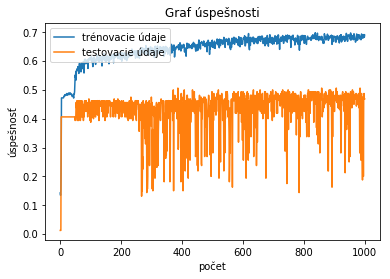

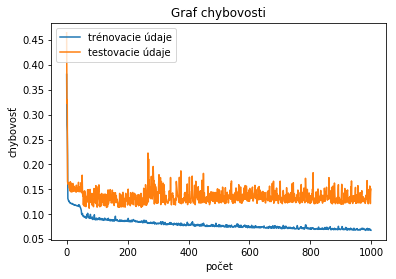

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Graf úspešnosti')
plt.ylabel('úspešnosť')
plt.xlabel('počet')
plt.legend(['trénovacie údaje', 'testovacie údaje'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Graf chybovosti')
plt.ylabel('chybovosť')
plt.xlabel('počet')
plt.legend(['trénovacie údaje', 'testovacie údaje'], loc='upper left')
plt.show()

In [31]:
print(model.evaluate(x_test,y_test,verbose=1))

160/160 [==============================] - 0s 89us/step
[0.15037614554166795, 0.46875]


In [32]:
ResultInference=model.predict(x_test)

In [33]:
NumTest=np.argmax(y_test,axis=1)
NumPred=np.argmax(ResultInference,axis=1)
NShow=37
print('Inference: ',NumPred[:NShow]+3)
print('y data:    ',NumTest[:NShow]+3)

Inference:  [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
y data:     [6 7 6 5 5 6 6 5 5 5 8 7 7 7 5 6 6 6 5 5 7 6 4 6 6 5 5 7 4 7 3 5 5 6 5 5 7]


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(NumTest, NumPred)
print(cm)

[[ 0  0  0  3  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  6 59  0  0]
 [ 0  0  0 69  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  2  0  0]]


In [35]:
from sklearn.metrics import accuracy_score #works
print(accuracy_score(NumTest, NumPred))

0.46875


In [36]:
MeanError=np.mean(np.abs(NumTest-NumPred))
print('Mean Error: ',MeanError)

Mean Error:  0.61875
